In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### data

Tensor("Const_16:0", shape=(200, 2), dtype=float64)
<tf.Variable 'Variable_15:0' shape=(3, 2) dtype=float64_ref>
Tensor("ExpandDims_27:0", shape=(1, 200, 2), dtype=float64)
Tensor("ExpandDims_28:0", shape=(3, 1, 2), dtype=float64)
Tensor("Sub_16:0", shape=(3, 200, 2), dtype=float64)
Tensor("Sum_9:0", shape=(3, 200), dtype=float64)
Tensor("ArgMin_6:0", shape=(200,), dtype=int64)
[[2.59513063 2.93480643]
 [8.18322257 3.37671515]
 [4.14681328 7.96779652]]
[2 1 0 1 0 1 2 1 2 1 2 2 0 0 0 1 1 2 0 0 1 2 2 2 1 2 1 2 2 0 1 1 1 1 1 2 2
 1 2 2 2 2 0 0 0 0 2 2 0 2 2 0 2 0 2 1 2 1 2 1 2 0 0 1 1 2 2 2 1 0 2 0 2 0
 1 1 0 0 1 1 1 0 0 1 2 1 2 0 0 1 0 2 2 0 0 0 2 0 2 2 2 2 1 2 2 1 1 1 1 2 0
 1 2 0 0 1 0 2 0 0 2 2 2 1 0 0 2 0 2 0 2 0 0 2 2 0 0 1 2 1 0 2 1 2 1 2 0 0
 1 1 2 0 1 0 1 0 1 2 0 2 0 2 2 2 2 2 2 1 2 2 1 1 1 2 2 2 2 2 1 1 1 1 2 2 1
 0 1 0 1 0 1 2 0 1 1 0 0 0 2 2]


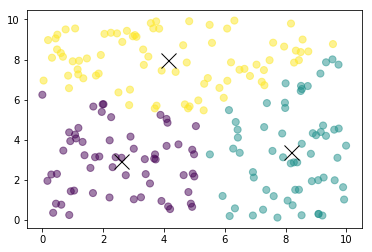

In [19]:
points_n = 200
cluster_n = 3
iteration_n = 100

points = tf.constant(np.random.uniform(0, 10, (points_n, 2)))
# print points
centroids = tf.Variable(tf.slice(tf.random_shuffle(points), [0, 0], [cluster_n, -1]))
# print centroids

points_expanded = tf.expand_dims(points, 0)
# print points_expanded
centroids_expanded = tf.expand_dims(centroids, 1)
# print centroids_expanded

# distance
l = tf.subtract(points_expanded, centroids_expanded)
# print l
distances = tf.reduce_sum(tf.square(tf.subtract(points_expanded, centroids_expanded)), 2)
# print distances
assignments = tf.argmin(distances, 0)
# print assignments

means = []
for c in range(cluster_n):
    means.append(tf.reduce_mean(tf.gather(points, tf.reshape(tf.where(tf.equal(assignments, c)), [1, -1])), 
                                reduction_indices=[1]))

new_centroids = tf.concat(means, 0)
update_centroids = tf.assign(centroids, new_centroids)
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for step in range(iteration_n):
        _, centroid_values, points_values, assignment_values = sess.run([update_centroids, centroids, points, assignments])
        
    print centroid_values
    print assignment_values
    
plt.scatter(points_values[:, 0], points_values[:, 1], c=assignment_values, s=50, alpha=0.5)
plt.plot(centroid_values[:, 0], centroid_values[:, 1], 'kx', markersize=15)
plt.show()
